<h1 style="text-align: center;"><strong>Breast Cancer Prediction</strong></h1>
<p style="text-align: center;"><strong>Kevin Milli</strong></p>

<a id="Objective"></a>
<h2 style="text-align: center;"><strong>Objectives and Goal</strong></h2>

I want to start a data research using a *Kaggle* dataset called the [Breast Cancer Dataset](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/data). 

**Dataset Description:**

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). 

---

The **objective** is to begin with an initial exploration, and then proceed with **Artificial Neaural Network (ANN)** for prediction task. 

The **goal**  to classify tumors into malignant (cancerous) or benign (non cancerous).

---

<a id="Setup"></a>
<h2 style="text-align: center;"><strong>Setup</strong></h2>

1. Pandas<br>
2. Numpy<br>
3. Matplotlib<br>
4. Seaborn<br>
5. scikit-learn<br>
6. tensorflow<br>
7. keras<br>

---

<a id="Data-Description"></a>
<h2 style="text-align: center;"><strong>Data Description</strong></h2>

<ul>
    <li><strong>Unique ID:</strong> Unique identifier for each record.</li>
    <li><strong>Diagnosis:</strong> Target variable indicating whether the tumor is malignant (M) or benign (B).</li>
    <li><strong>Radius (Mean):</strong> Average size of the lobes.</li>
    <li><strong>Texture (Mean):</strong> Average surface texture of the tumor.</li>
    <li><strong>Perimeter (Mean):</strong> Average outer perimeter of the lobes.</li>
    <li><strong>Area (Mean):</strong> Average area of the lobes.</li>
    <li><strong>Smoothness (Mean):</strong> Average smoothness levels of the tumor.</li>
    <li><strong>Compactness (Mean):</strong> Average compactness of the tumor.</li>
    <li><strong>Concavity (Mean):</strong> Average concavity of the tumor.</li>
    <li><strong>Concave Points (Mean):</strong> Average number of concave points in the tumor.</li>
    <li><strong>Symmetry (Mean):</strong> Average symmetry of the tumor.</li>
    <li><strong>Fractal Dimension (Mean):</strong> Average fractal dimension of the tumor.</li>
    <li><strong>Radius (SE):</strong> Standard error of the radius.</li>
    <li><strong>Texture (SE):</strong> Standard error of the texture.</li>
    <li><strong>Perimeter (SE):</strong> Standard error of the perimeter.</li>
    <li><strong>Area (SE):</strong> Standard error of the area.</li>
    <li><strong>Smoothness (SE):</strong> Standard error of the smoothness.</li>
    <li><strong>Compactness (SE):</strong> Standard error of the compactness.</li>
    <li><strong>Concavity (SE):</strong> Standard error of the concavity.</li>
    <li><strong>Concave Points (SE):</strong> Standard error of the number of concave points.</li>
    <li><strong>Symmetry (SE):</strong> Standard error of the symmetry.</li>
    <li><strong>Fractal Dimension (SE):</strong> Standard error of the fractal dimension.</li>
    <li><strong>Radius (Worst):</strong> Worst case scenario for the radius.</li>
    <li><strong>Texture (Worst):</strong> Worst case scenario for the texture.</li>
    <li><strong>Perimeter (Worst):</strong> Worst case scenario for the perimeter.</li>
    <li><strong>Area (Worst):</strong> Worst case scenario for the area.</li>
    <li><strong>Smoothness (Worst):</strong> Worst case scenario for the smoothness.</li>
    <li><strong>Compactness (Worst):</strong> Worst case scenario for the compactness.</li>
    <li><strong>Concavity (Worst):</strong> Worst case scenario for the concavity.</li>
    <li><strong>Concave Points (Worst):</strong> Worst case scenario for the number of concave points.</li>
    <li><strong>Symmetry (Worst):</strong> Worst case scenario for the symmetry.</li>
    <li><strong>Fractal Dimension (Worst):</strong> Worst case scenario for the fractal dimension.</li>
</ul>



---

<h2 style="text-align: center;"><strong>Table of contents</strong></h2>

[1. Objectives and Goal](#Objective)<br>
[2. Setup](#Setup)<br>
[3. Data Description](#Data-Description)<br>
[4. Feature Engineering](#FeatureEngineering)<br>
[5. Tools and Function](#ToolsFunction)<br>
[6. Exploratory Data Analysis](#EDA)<br>
[7. Data Preprocessing](#DataPreprocessing)<br>
[8. ANN](#ann)<br>
[9. Conclusios](#conclusions)

---

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score

from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, Adagrad, SGD

from tqdm.notebook import tqdm

import warnings

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set()
warnings.filterwarnings('ignore')

### Data

In [3]:
df = pd.read_csv('data/breast-cancer.csv')
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


<a id="ToolsFunction"></a>
<h2 style="text-align: center;"><strong>Tools and Functions</strong></h2>

In [4]:
def find_outliers(data, column=None, threshold=2):
    # First quartile (25%) and the third quartile (75%) of the column data
    if data[column].isnull().sum() > 0:
        Q1 = np.nanquantile(data[column], 0.25)
        Q3 = np.nanquantile(data[column], 0.75)
    else:
        Q1 = np.percentile(data[column], 25)
        Q3 = np.percentile(data[column], 75)
    
    # Interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Lower and Upper bounds for outliers
    lower_limit = Q1 - threshold * IQR
    upper_limit = Q3 + threshold * IQR
    
    # Find the outliers within the specified column
    outliers = data[(data[column] < lower_limit) | (data[column] > upper_limit)]
    
    return outliers

In [5]:
def split_data(X, y, test_size=0.4, val_size=0.5, random_state=42):
    """
    The split_data function is designed to simplify 
    the process of dividing a dataset into three parts: 
        - training set, validation set, and test set.
    
    Method: StratifiedShuffleSplit
    
    Parameters:
    
        X: The feature DataFrame, the dataset to be split.
        y: The Series or array of labels corresponding to the features in the dataset.
        test_size (default=0.4): The proportion of the dataset to allocate as the test set.
        val_size (default=0.5): The proportion of the test set to allocate as the validation set.
        random_state (default=42): The seed for data splitting reproducibility.
        
    Output: X_train, X_val, X_test, y_train, y_val, y_test
"""

    splitter = StratifiedShuffleSplit(random_state=random_state, test_size=test_size, n_splits=1)
    
    for train_idx, test_idx in splitter.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    splitter2 = StratifiedShuffleSplit(random_state=random_state, test_size=val_size, n_splits=1)
    
    for train_idx, val_idx in splitter2.split(X_test, y_test):
        X_test, X_val = X_test.iloc[train_idx], X_test.iloc[val_idx]
        y_test, y_val = y_test.iloc[train_idx], y_test.iloc[val_idx]
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [6]:
def plot_roc(y_true, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on Breast Cancer dataset'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

<a id="FeatureEngineering"></a>
<h2 style="text-align: center;"><strong>Feature Engineering</strong></h2>

In [7]:
df = df.drop('id', axis=1)

In [8]:
map_ = {"M":1.0, "B":0.0}
df['diagnosis'] = df['diagnosis'].map(map_)

<a id="EDA"></a>
<h2 style="text-align: center;"><strong>Exploratory Data Analysis</strong></h2>

In [9]:
null_values = df.isnull().sum()
print(f"There are: {len(null_values[null_values>0])} Null values")

There are: 0 Null values


In [10]:
df.dtypes.value_counts()

float64    31
Name: count, dtype: int64

In [11]:
df.duplicated().sum()
print(f"There are: {len(null_values[null_values>0])} Duplicated Records")

There are: 0 Duplicated Records


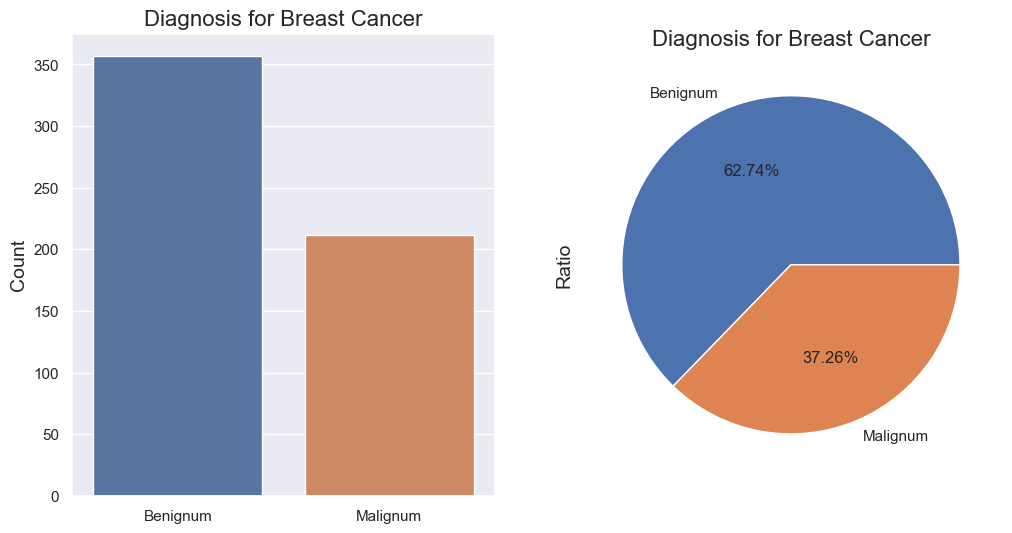

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
labels = ["Benignum", "Malignum"]

# Grafico a barre
sns.countplot(data=df, x='diagnosis', ax=axs[0],
              order=df['diagnosis'].value_counts().sort_values(ascending=False).index, 
             )
axs[0].set_title('Diagnosis for Breast Cancer', fontsize=16)
axs[0].set_ylabel('Count', fontsize=14)
axs[0].set_xlabel('')
axs[0].set_xticklabels(labels)

# Grafico a torta
df['diagnosis'].value_counts().plot.pie(ax=axs[1], autopct='%.2f%%', labels=labels)
axs[1].set_title("Diagnosis for Breast Cancer", fontsize=16)
axs[1].set_ylabel('Ratio', fontsize=14)

plt.show()

In [13]:
# groups: radius, texture, perimeter, area, smoothness, compactness, concavity, concave, symmetry, fractal
groups = {
    'radius': ['radius_mean', 'radius_se', 'radius_worst'],
    'texture': ['texture_mean', 'texture_se', 'texture_worst'],
    'perimeter': ['perimeter_mean', 'perimeter_se', 'perimeter_worst'],
    'area': ['area_mean', 'area_se', 'area_worst'],
    'smoothness': ['smoothness_mean', 'smoothness_se', 'smoothness_worst'],
    'compactness': ['compactness_mean', 'compactness_se', 'compactness_worst'],
    'concavity': ['concavity_mean', 'concavity_se', 'concavity_worst'],
    'concave': ['concave points_mean', 'concave points_se', 'concave points_worst'],
    'symmetry': ['symmetry_mean', 'symmetry_se', 'symmetry_worst'],
    'fractal': ['fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst']
}

# describe() for each groups
for group_name, group_columns in groups.items():
    group_df = df[group_columns]
    print(f"Describe for {group_name}:")
    print(group_df.describe())
    print("\n")

Describe for radius:
       radius_mean   radius_se  radius_worst
count   569.000000  569.000000    569.000000
mean     14.127292    0.405172     16.269190
std       3.524049    0.277313      4.833242
min       6.981000    0.111500      7.930000
25%      11.700000    0.232400     13.010000
50%      13.370000    0.324200     14.970000
75%      15.780000    0.478900     18.790000
max      28.110000    2.873000     36.040000


Describe for texture:
       texture_mean  texture_se  texture_worst
count    569.000000  569.000000     569.000000
mean      19.289649    1.216853      25.677223
std        4.301036    0.551648       6.146258
min        9.710000    0.360200      12.020000
25%       16.170000    0.833900      21.080000
50%       18.840000    1.108000      25.410000
75%       21.800000    1.474000      29.720000
max       39.280000    4.885000      49.540000


Describe for perimeter:
       perimeter_mean  perimeter_se  perimeter_worst
count      569.000000    569.000000       569.00

In [15]:
df_skewness = []

for col in df.columns:
    skewness = df[col].skew()
    df_skewness.append(skewness)

In [16]:
pd.DataFrame(data=df_skewness, 
             index=df.columns, 
             columns=["Skewness"]).sort_values('Skewness', ascending=False)[:25]

,Skewness
area_se,5.447186
concavity_se,5.110463
fractal_dimension_se,3.923969
perimeter_se,3.443615
radius_se,3.088612
smoothness_se,2.314450
symmetry_se,2.195133
compactness_se,1.902221
area_worst,1.859373
fractal_dimension_worst,1.662579


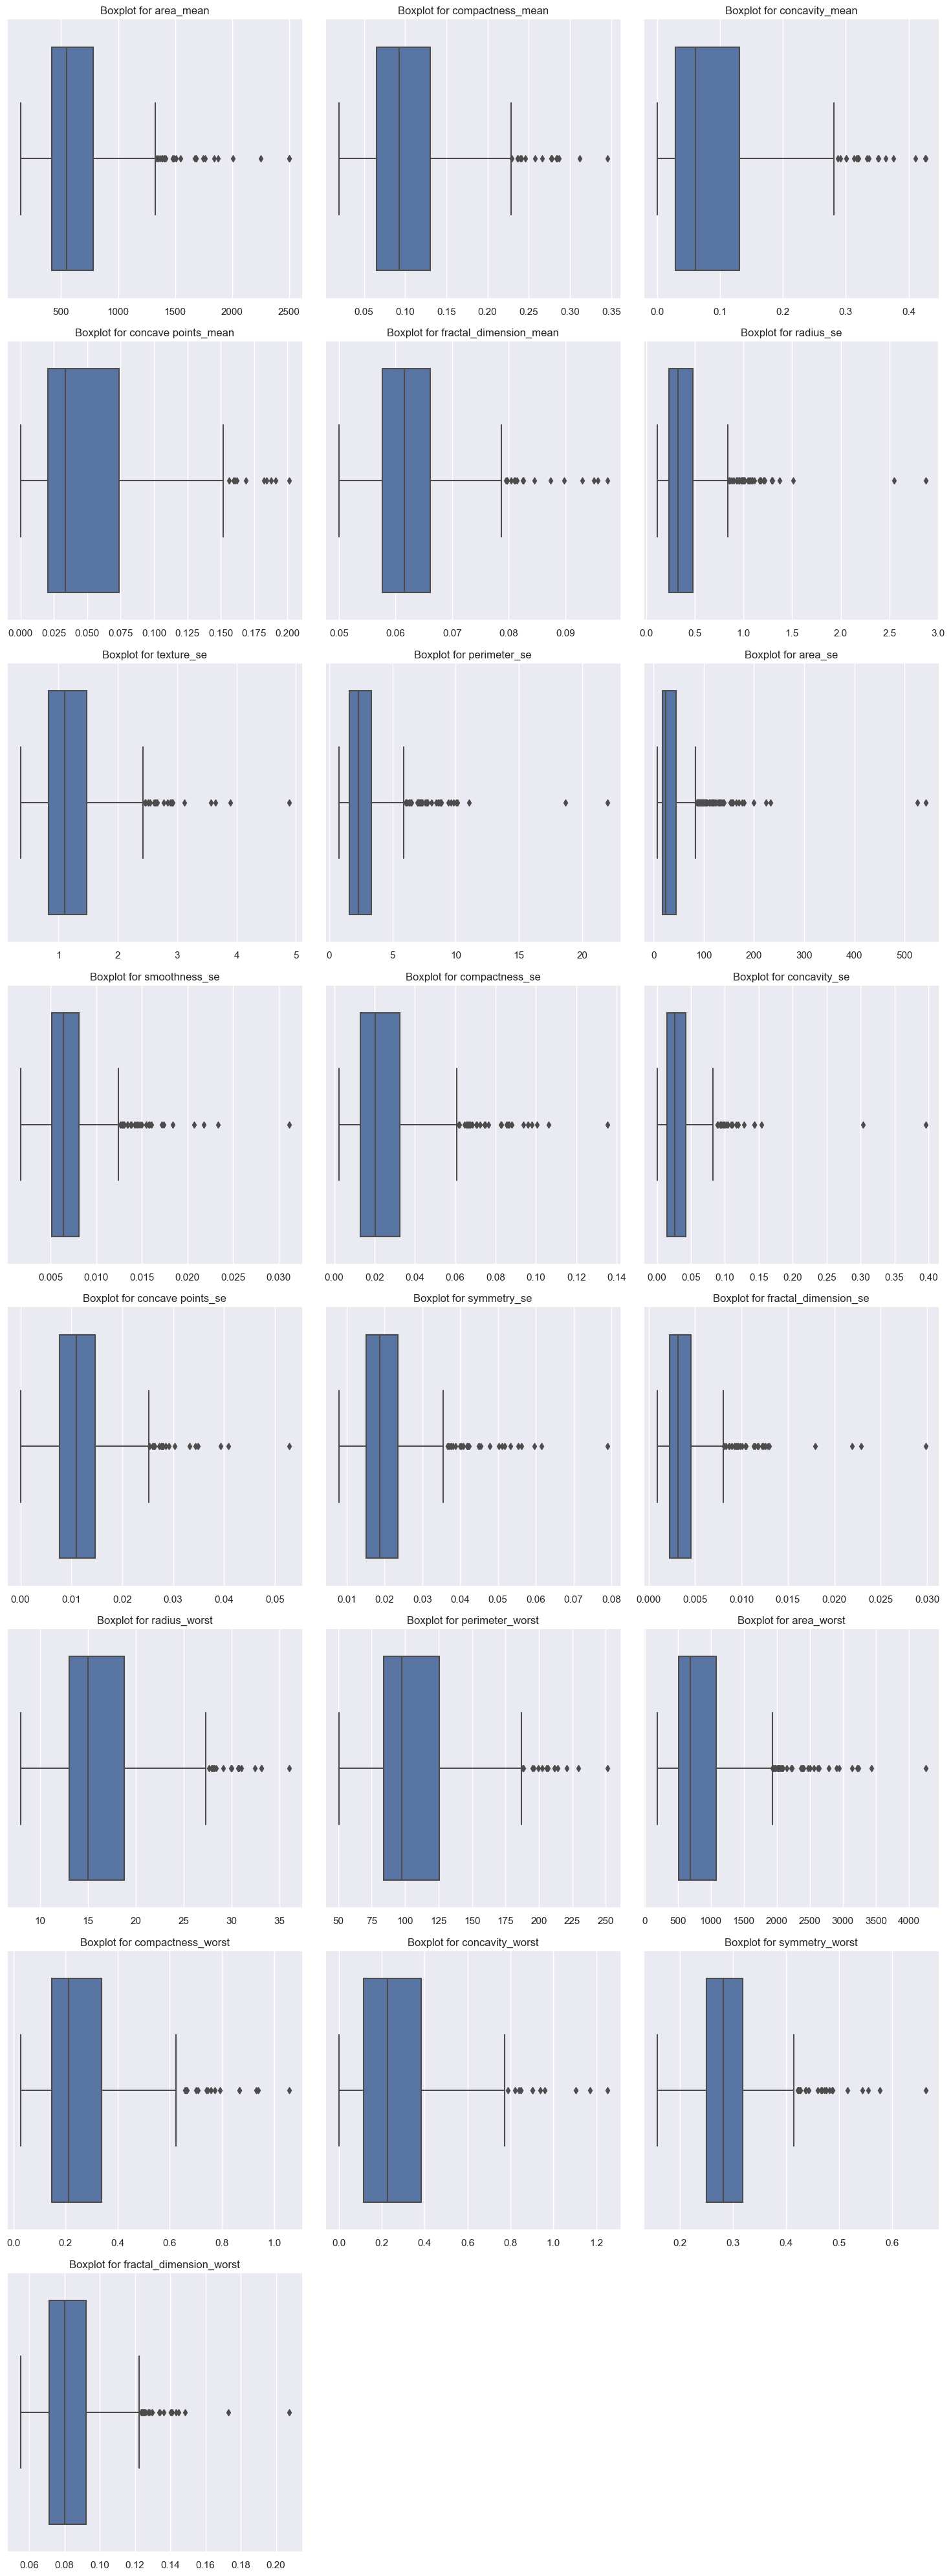

In [17]:
# Convert skewness values to a pandas Series
df_skewness = pd.Series(df_skewness)
df_skewness = df_skewness.reset_index(drop=True)
skewed_columns = df_skewness[df_skewness > 1.0].index   # Select columns with skewness greater than 1.0

# Calculate the number of plots and cols needed
num_plots = len(skewed_columns)
num_cols = 3

# Calculate the number of rows needed in the subplot grid
num_rows = int(np.ceil(num_plots / num_cols))

# Set the dimensions of the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the array of axes in case there's only one row
axes = axes.flatten()

# Iterate over columns with skewness greater than 1 and create boxplots
for i, col_index in enumerate(skewed_columns):
    # Get the column name from the numeric index
    col = df.columns[col_index]
    
    # Create a boxplot for the current column
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')
    axes[i].set_xlabel("")

# Remove unused axes in the subplot grid
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

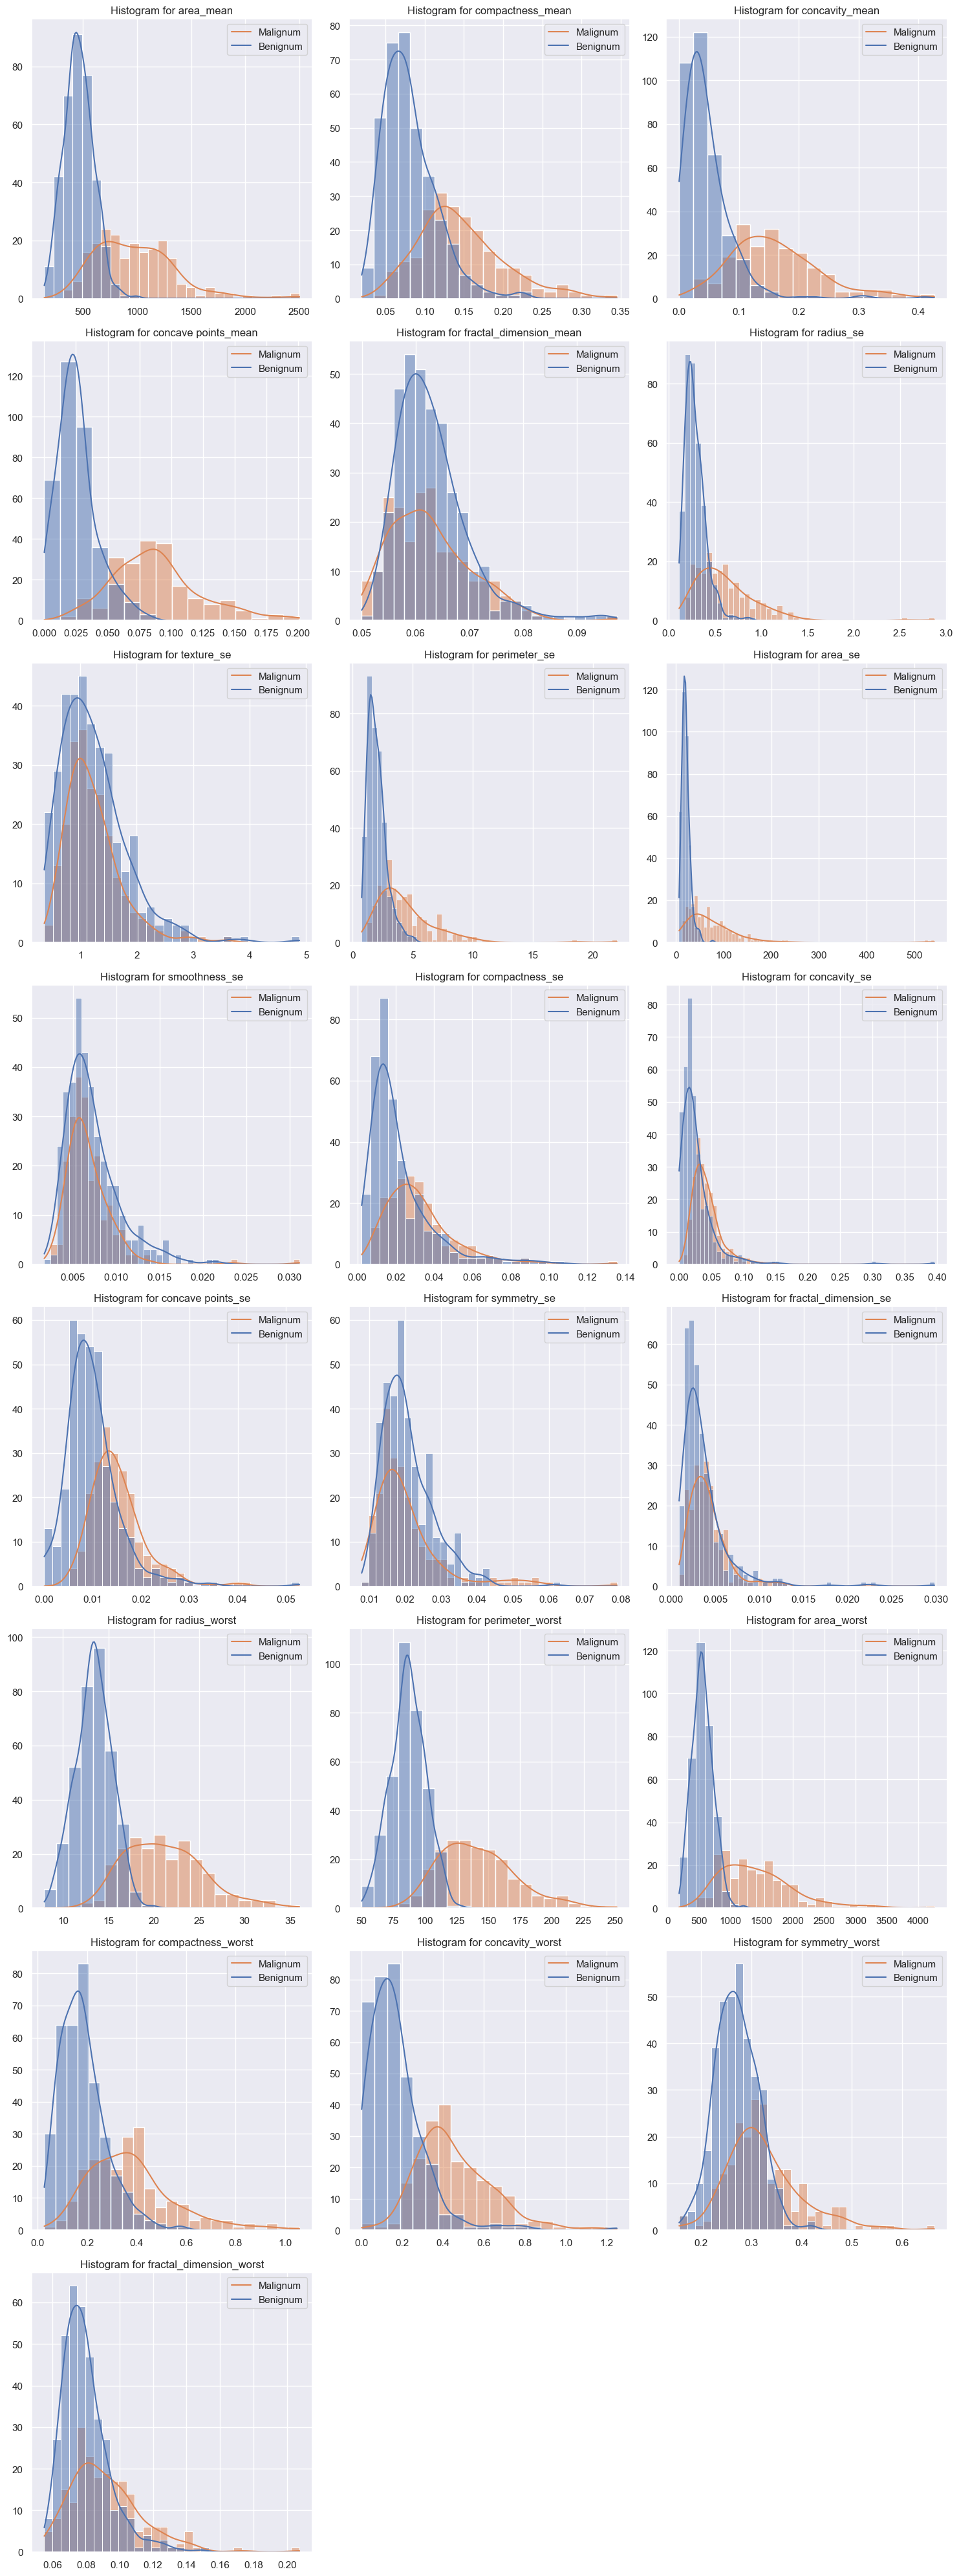

In [18]:
# Convert skewness values to a pandas Series
df_skewness = pd.Series(df_skewness)
df_skewness = df_skewness.reset_index(drop=True)
skewed_columns = df_skewness[df_skewness > 1.0].index   # Select columns with skewness greater than 1.0
labels = ["Malignum", "Benignum"]

# Calculate the number of plots and cols needed
num_plots = len(skewed_columns)
num_cols = 3

# Calculate the number of rows needed in the subplot grid
num_rows = int(np.ceil(num_plots / num_cols))

# Set the dimensions of the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the array of axes in case there's only one row
axes = axes.flatten()

# Iterate over columns with skewness greater than 1 and create boxplots
for i, col_index in enumerate(skewed_columns):
    # Get the column name from the numeric index
    col = df.columns[col_index]
    
    # Create a histplot for the current column
    sns.histplot(x=df[col], ax=axes[i], hue=df['diagnosis'], kde=True)
    axes[i].set_title(f'Histogram for {col}')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].legend(labels)

# Remove unused axes in the subplot grid
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

### Correlation Analysis

In [19]:
# Calculate the correlation matrix
corr = df.corr(numeric_only=True)

# Fill NaN values with 0
corr.fillna(0, inplace=True)

# Set the main diagonal (correlation values of each variable with itself) to 0.0
for column in corr.columns:
    corr.at[column, column] = 0.0

# Find the index of the column with the highest correlation value for each variable
max_corr_columns = corr.abs().idxmax()

# Find the maximum correlation value for each variable
max_corr_values = corr.max()

# Create a DataFrame to display the results
corr_df = max_corr_columns.to_frame(name='Most_Correlated_Variable')

# Add a 'Correlation_Degree' column to corr_df
corr_df['Correlation_Degree'] = max_corr_values

# Print the resulting DataFrame
corr_df.sort_values('Correlation_Degree', ascending=False)

,Most_Correlated_Variable,Correlation_Degree
perimeter_mean,radius_mean,0.997855
radius_mean,perimeter_mean,0.997855
perimeter_worst,radius_worst,0.993708
radius_worst,perimeter_worst,0.993708
area_mean,radius_mean,0.987357
area_worst,radius_worst,0.984015
radius_se,perimeter_se,0.972794
perimeter_se,radius_se,0.972794
area_se,radius_se,0.951830
concavity_mean,concave points_mean,0.921391


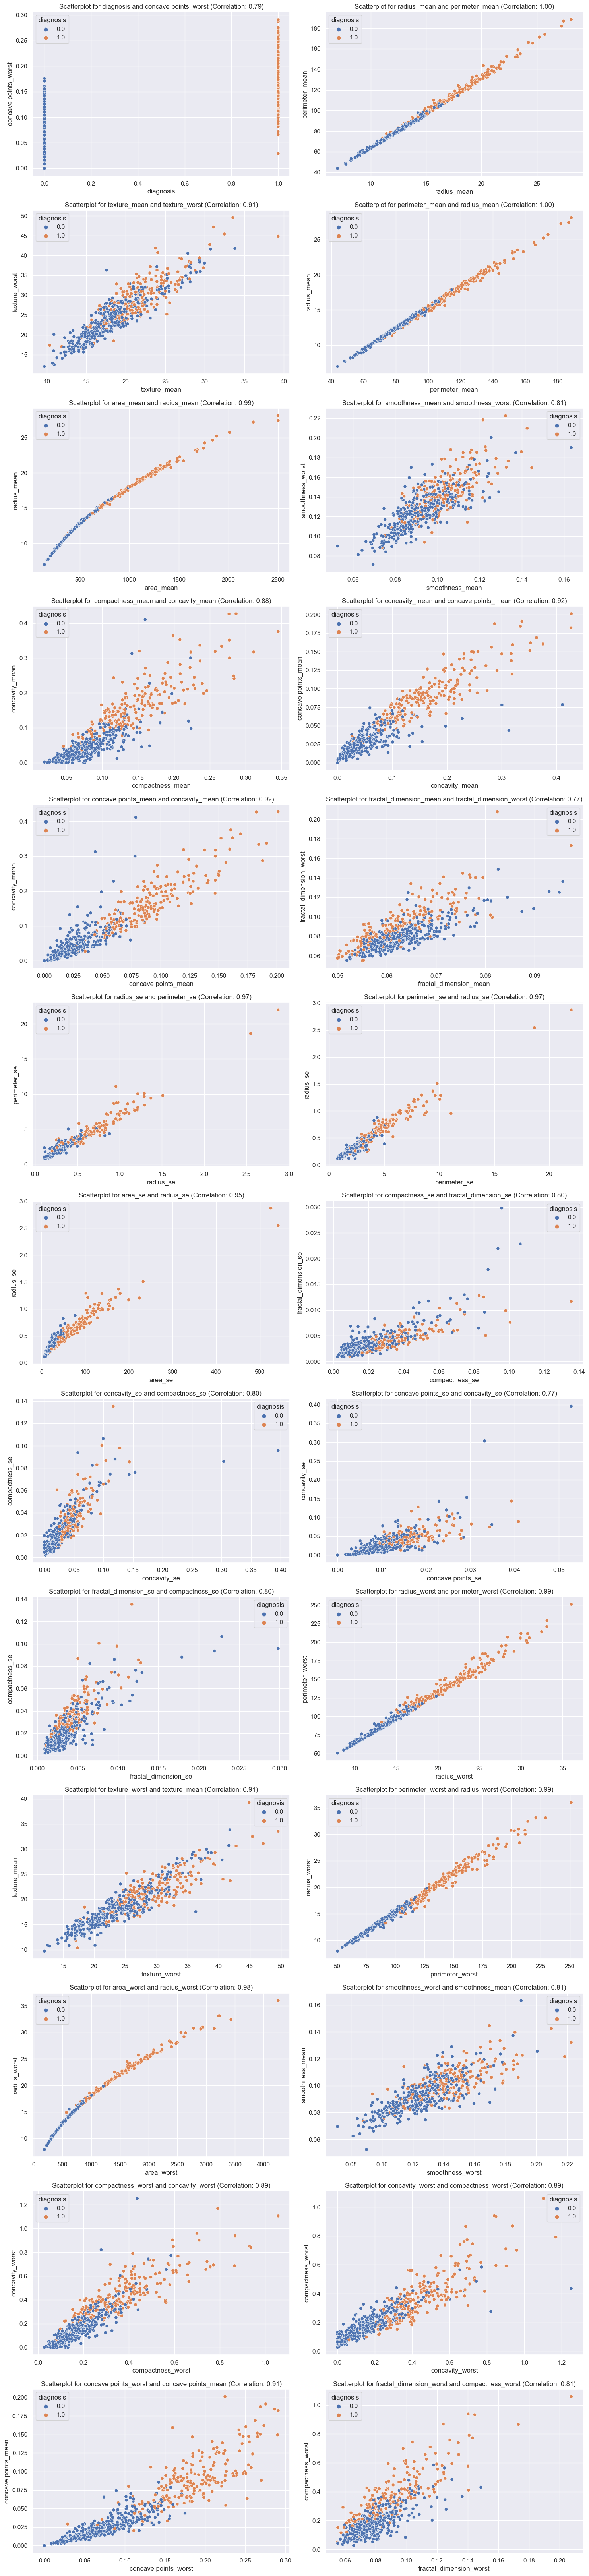

In [20]:
high_corr_df = corr_df[corr_df['Correlation_Degree'] > 0.70]

# Calculate the number of rows and columns needed for subplots
num_plots = len(high_corr_df)
num_cols = 2
num_rows = int(np.ceil(num_plots / num_cols))

# Set the dimensions of the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the array of axes in case there's only one row
axes = axes.flatten()

# Iterate over the filtered rows and create jointplots
for i, (index, row) in enumerate(high_corr_df.iterrows()):
    col1 = index
    col2 = row['Most_Correlated_Variable']
    degree = row['Correlation_Degree']
    
    # Determine the current subplot
    ax = axes[i]
    
    # Create a jointplot using sns.scatterplot
    sns.scatterplot(x=df[col1], y=df[col2], hue=df['diagnosis'], ax=ax)
    
    # Set title and labels
    ax.set_title(f'Scatterplot for {col1} and {col2} (Correlation: {degree:.2f})')

# Remove unused axes in the subplot grid
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<a id="DataPreprocessing"></a>
<h2 style="text-align: center;"><strong>Data Preprocessing</strong></h2>

In [21]:
X = df.drop(columns="diagnosis")
y = df["diagnosis"]

In [22]:
robust_scaler = RobustScaler()

scaled_robust_df = robust_scaler.fit_transform(X)
scaled_robust_df = pd.DataFrame(columns=X.columns, data=scaled_robust_df)

In [23]:
scaler = StandardScaler()

scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(columns=X.columns, data=scaled_df)

In [24]:
scaled_df.shape

(569, 30)

In [25]:
# Tolerance for the comparison
tolerance = 1e-6

# Check if the data in the two scalings are close
are_close = np.all(np.isclose(scaled_robust_df, scaled_df, rtol=tolerance))

if are_close:
    print("The data in the two scalings are close.")
else:
    print("The data in the two scalings are different.")

The data in the two scalings are different.


In [26]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(scaled_df, y)

In [27]:
X_train_robust, X_val_robust, X_test_robust, y_train_robust, y_val_robust, y_test_robust = split_data(scaled_robust_df, y)

In [28]:
print(f"StandardScaler:\n y_train: {y_train.shape}\ny_test: {y_test.shape}\ny_val: {y_val.shape}\n")
print(f"RobustScaler:\n y_train: {y_train_robust.shape}\ny_test: {y_test_robust.shape}\ny_val: {y_val_robust.shape}")

StandardScaler:
 y_train: (341,)
y_test: (114,)
y_val: (114,)

RobustScaler:
 y_train: (341,)
y_test: (114,)
y_val: (114,)


Here I have chosen to try two variations; the first involves scaling the data using StandardScaler, <br>
while the second involves scaling the data using RobustScaler, which allows for a more robust scaling to handle outliers.

<a id="ann"></a>
<h2 style="text-align: center;"><strong>Artificial Neural Network (ANN)</strong></h2>

### StandardScaler Test

In [29]:
model = Sequential(
[
    Dense(64, 
          input_shape=X_train.shape[1:],
          activation='relu', 
          name='dense_1'),
    Dense(32, 
          activation='relu', 
          name='dense_2'),
    Dropout(0.2),
    Dense(1, 
          activation="sigmoid", 
          name='dense_3')
], name='Sequential')

model.build(input_shape=X_train.shape[1:])
model.summary()

Model: "Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                1984      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
NAMES = ['SGD', 'SGD_momentum', 'Adam']
epochs = 10
batch_size = 64
shuffle = True

# dicts for storing results
loss      = {opt:[] for opt in NAMES}
val_loss  = {opt:[] for opt in NAMES}
acc       = {opt:[] for opt in NAMES}
val_acc   = {opt:[] for opt in NAMES}
test_acc  = {}
test_loss = {}

In [31]:
weights = model.get_weights().copy()

with tqdm(desc='Training', total=len(NAMES*epochs)) as pbar:
    for name in NAMES:
        optimizer=''
        
        # prepare model
        model.set_weights(weights)
        if name == 'SGD':
            optimizer= SGD(learning_rate=0.001)
        elif name=='SGD_momentum':
            optimizer=SGD(learning_rate=0.001, momentum=0.9)
        elif name=='Adam':
            optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
        print('Optimizer: ', name)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        
        # train model
        for epoch in range(epochs):
            his = model.fit(X_train, y_train,
                            epochs=1,
                            batch_size=batch_size,
                            validation_data=(X_val, y_val),
                            shuffle=shuffle,
                            verbose=0)
            
            # update dictionaries
            loss[name].append(his.history['loss'][0])
            val_loss[name].append(his.history['val_loss'][0])
            acc[name].append(his.history['accuracy'][0])
            val_acc[name].append(his.history['val_accuracy'][0])   
            pbar.update(1)
            
        # inference
        t_loss, t_acc = model.evaluate(X_test, y_test, verbose=0)
        test_loss[name] = t_loss
        test_acc[name] = t_acc

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Optimizer:  SGD
Optimizer:  SGD_momentum
Optimizer:  Adam


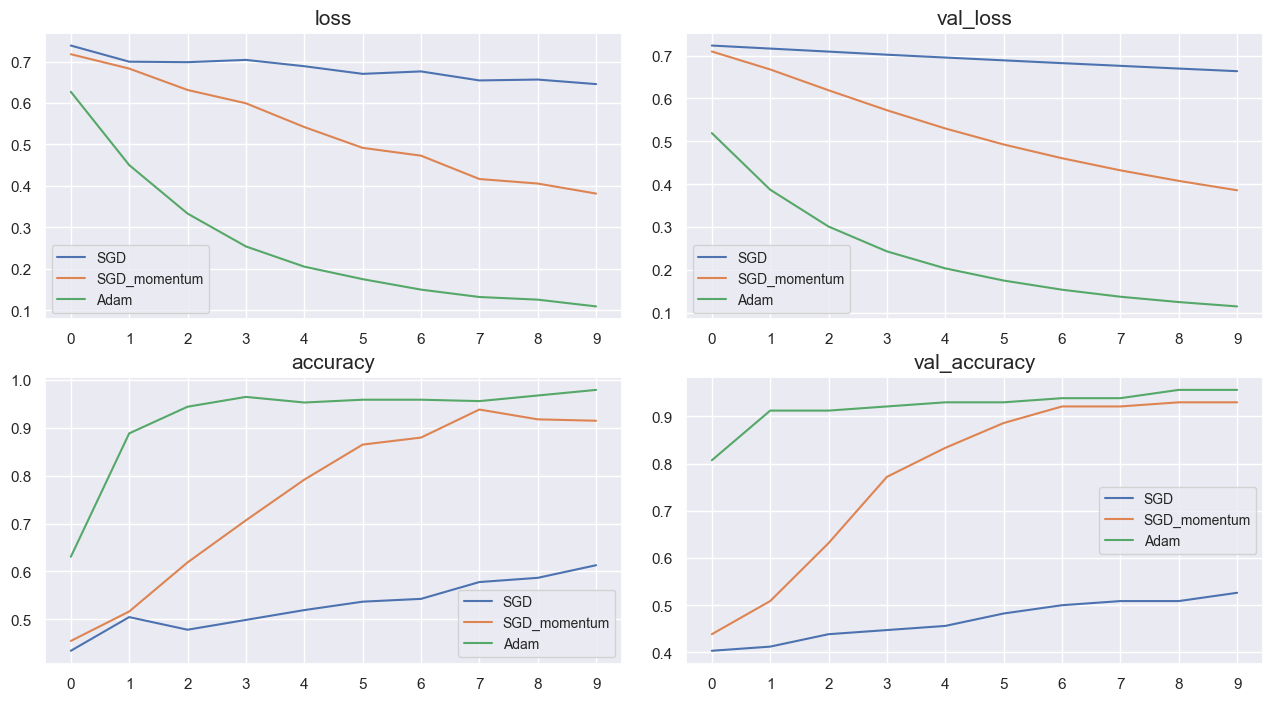

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(13, 7))
plt.tight_layout()
plt.subplots_adjust(hspace=0.2)


for index, result, title in zip([[0, 0], [0, 1], [1, 0], [1, 1]], 
                                [loss, val_loss, acc, val_acc], 
                                ['loss', 'val_loss', 'accuracy', 'val_accuracy']):
    i, j = index
    for name, values in result.items():
        axs[i, j].plot(values, label=name)
        axs[i, j].set_title(title, size=15)
        axs[i, j].set_xticks([e for e in range(epochs)])
        axs[i, j].legend(loc="best", prop={'size': 10})

As seen above, SGD with momentum outperforms SGD without momentum. In this case, **Adam** performs the best.

In [33]:
# Choose the optimal optimizer for the final model
best_optimizer = 'Adam'

# Create a new neural network model with the selected optimizer
final_model = Sequential(
    [
        Dense(64, input_shape=X_train.shape[1:], activation='relu', name='dense_1'),
        Dense(32, activation='relu', name='dense_2'),
        Dropout(0.2), # prevention for overfitting
        Dense(1, activation="sigmoid", name='dense_3')
    ],
    name='Final_Model'
)

final_model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# Train the final model on the entire training set for an extended number of epochs
final_epochs = 15  # or any other suitable number of epochs
final_model.fit(X_train, y_train, epochs=final_epochs, batch_size=batch_size, verbose=1)

# Evaluate the performance of the final model on the test set
final_test_loss, final_test_acc = final_model.evaluate(X_test, y_test, verbose=0)
print(f'Final Test Loss: {final_test_loss}, Final Test Accuracy: {final_test_acc}')

Epoch 1/15
6/6 [==============================] - 1s 2ms/step - loss: 0.6614 - accuracy: 0.6334
Epoch 2/15
6/6 [==============================] - 0s 1ms/step - loss: 0.5104 - accuracy: 0.8504
Epoch 3/15
6/6 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.9208
Epoch 4/15
6/6 [==============================] - 0s 1ms/step - loss: 0.3299 - accuracy: 0.9238
Epoch 5/15
6/6 [==============================] - 0s 1ms/step - loss: 0.2705 - accuracy: 0.9413
Epoch 6/15
6/6 [==============================] - 0s 1ms/step - loss: 0.2300 - accuracy: 0.9443
Epoch 7/15
6/6 [==============================] - 0s 1ms/step - loss: 0.1985 - accuracy: 0.9472
Epoch 8/15
6/6 [==============================] - 0s 2ms/step - loss: 0.1766 - accuracy: 0.9589
Epoch 9/15
6/6 [==============================] - 0s 2ms/step - loss: 0.1505 - accuracy: 0.9648
Epoch 10/15
6/6 [==============================] - 0s 1ms/step - loss: 0.1397 - accuracy: 0.9619
Epoch 11/15
6/6 [======================

4/4 [==============================] - 0s 1ms/step


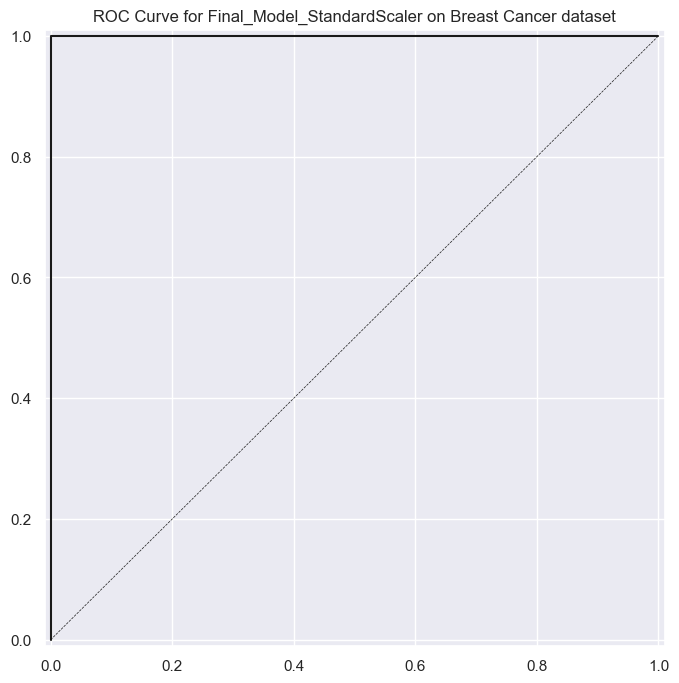

In [34]:
y_pred_prob = final_model.predict(X_test)

# Estrai le probabilità positive
y_pred_prob_positive = y_pred_prob.flatten()

# Chiamare la funzione plot_roc
plot_roc(y_test, y_pred_prob_positive, 'Final_Model_StandardScaler')
plt.show()

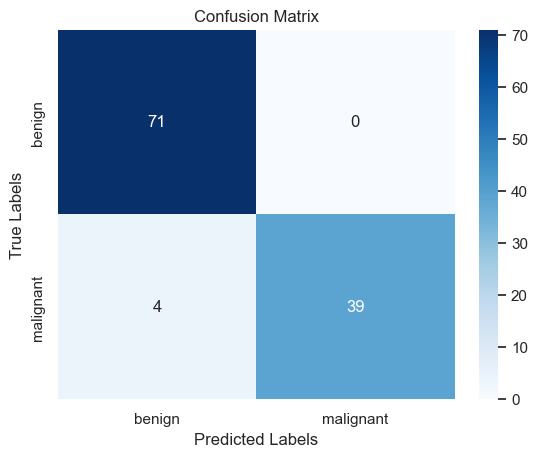

In [35]:
y_pred_labels = (y_pred_prob_positive > 0.5).astype(int)

# Calcola la matrice di confusione
cm = confusion_matrix(y_test, y_pred_labels)
class_labels = ["benign", "malignant"]

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show();

### RobustScaler Test

In [36]:
model = Sequential(
[
    Dense(64, 
          input_shape=X_train_robust.shape[1:],
          activation='relu', 
          name='dense_1'),
    Dense(32, 
          activation='relu', 
          name='dense_2'),
    Dropout(0.2),
    Dense(1, 
          activation="sigmoid", 
          name='dense_3')
], name='Sequential')

model.build(input_shape=X_train_robust.shape[1:])
model.summary()

Model: "Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                1984      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
NAMES = ['SGD', 'SGD_momentum', 'Adam']
epochs = 10
batch_size = 64
shuffle = True

# dicts for storing results
loss      = {opt:[] for opt in NAMES}
val_loss  = {opt:[] for opt in NAMES}
acc       = {opt:[] for opt in NAMES}
val_acc   = {opt:[] for opt in NAMES}
test_acc  = {}
test_loss = {}

In [38]:
weights = model.get_weights().copy()

with tqdm(desc='Training', total=len(NAMES*epochs)) as pbar:
    for name in NAMES:
        optimizer=''
        
        # prepare model
        model.set_weights(weights)
        if name == 'SGD':
            optimizer= SGD(learning_rate=0.001)
        elif name=='SGD_momentum':
            optimizer=SGD(learning_rate=0.001, momentum=0.9)
        elif name=='Adam':
            optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
        print('Optimizer: ', name)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        
        # train model
        for epoch in range(epochs):
            his = model.fit(X_train_robust, y_train_robust,
                            epochs=1,
                            batch_size=batch_size,
                            validation_data=(X_val_robust, y_val_robust),
                            shuffle=shuffle,
                            verbose=0)
            
            # update dictionaries
            loss[name].append(his.history['loss'][0])
            val_loss[name].append(his.history['val_loss'][0])
            acc[name].append(his.history['accuracy'][0])
            val_acc[name].append(his.history['val_accuracy'][0])   
            pbar.update(1)
            
        # inference
        t_loss, t_acc = model.evaluate(X_test_robust, y_test_robust, verbose=0)
        test_loss[name] = t_loss
        test_acc[name] = t_acc

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Optimizer:  SGD
Optimizer:  SGD_momentum
Optimizer:  Adam


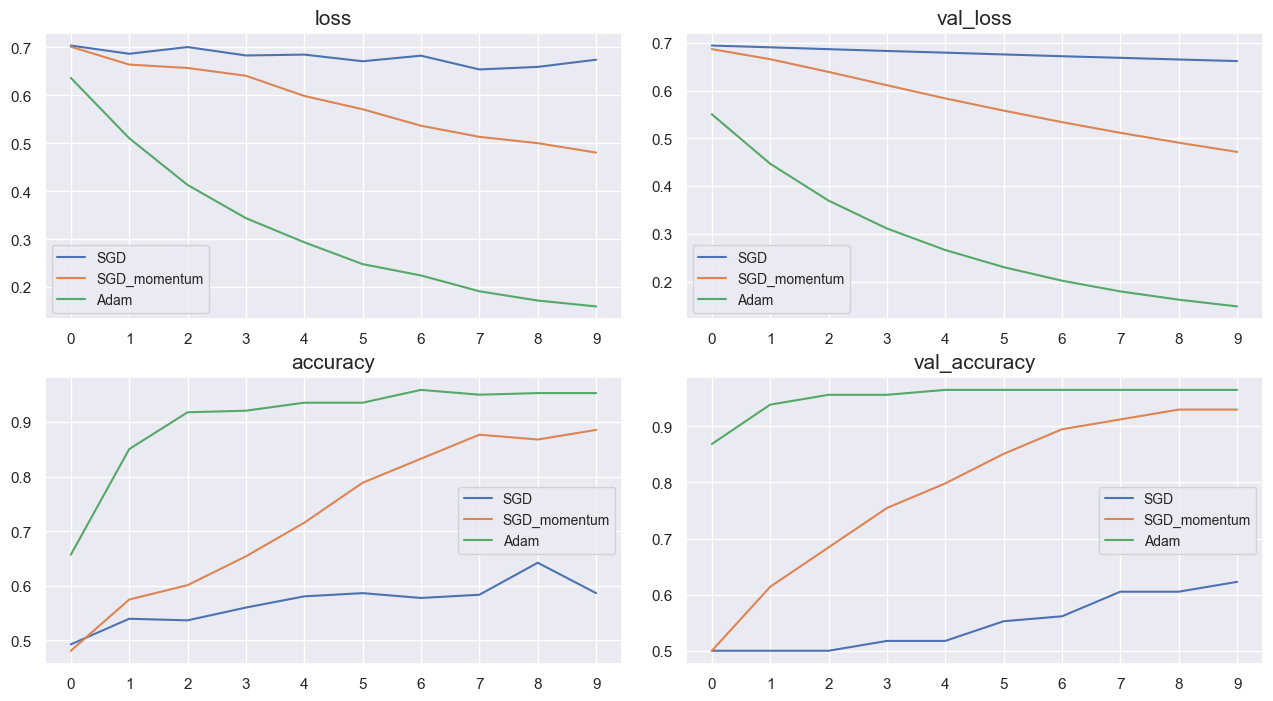

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(13, 7))
plt.tight_layout()
plt.subplots_adjust(hspace=0.2)


for index, result, title in zip([[0, 0], [0, 1], [1, 0], [1, 1]], 
                                [loss, val_loss, acc, val_acc], 
                                ['loss', 'val_loss', 'accuracy', 'val_accuracy']):
    i, j = index
    for name, values in result.items():
        axs[i, j].plot(values, label=name)
        axs[i, j].set_title(title, size=15)
        axs[i, j].set_xticks([e for e in range(epochs)])
        axs[i, j].legend(loc="best", prop={'size': 10})

In [40]:
# Choose the optimal optimizer for the final model
best_optimizer = 'Adam'

# Create a new neural network model with the selected optimizer
final_model = Sequential(
    [
        Dense(64, input_shape=X_train_robust.shape[1:], activation='relu', name='dense_1'),
        Dense(32, activation='relu', name='dense_2'),
        Dropout(0.2), # prevention for overfitting
        Dense(1, activation="sigmoid", name='dense_3')
    ],
    name='Final_Model'
)

final_model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# Train the final model on the entire training set for an extended number of epochs
final_epochs = 15  # or any other suitable number of epochs
final_model.fit(X_train_robust, y_train_robust, epochs=final_epochs, batch_size=batch_size, verbose=1)

# Evaluate the performance of the final model on the test set
final_test_loss, final_test_acc = final_model.evaluate(X_test_robust, y_test_robust, verbose=0)
print(f'Final Test Loss: {final_test_loss}, Final Test Accuracy: {final_test_acc}')

Epoch 1/15
6/6 [==============================] - 1s 2ms/step - loss: 0.7521 - accuracy: 0.5249
Epoch 2/15
6/6 [==============================] - 0s 1ms/step - loss: 0.5813 - accuracy: 0.7889
Epoch 3/15
6/6 [==============================] - 0s 1ms/step - loss: 0.4738 - accuracy: 0.9179
Epoch 4/15
6/6 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.9267
Epoch 5/15
6/6 [==============================] - 0s 1ms/step - loss: 0.3256 - accuracy: 0.9472
Epoch 6/15
6/6 [==============================] - 0s 2ms/step - loss: 0.2716 - accuracy: 0.9413
Epoch 7/15
6/6 [==============================] - 0s 1ms/step - loss: 0.2480 - accuracy: 0.9443
Epoch 8/15
6/6 [==============================] - 0s 1ms/step - loss: 0.2071 - accuracy: 0.9589
Epoch 9/15
6/6 [==============================] - 0s 1ms/step - loss: 0.1861 - accuracy: 0.9531
Epoch 10/15
6/6 [==============================] - 0s 1ms/step - loss: 0.1708 - accuracy: 0.9501
Epoch 11/15
6/6 [======================

4/4 [==============================] - 0s 1ms/step


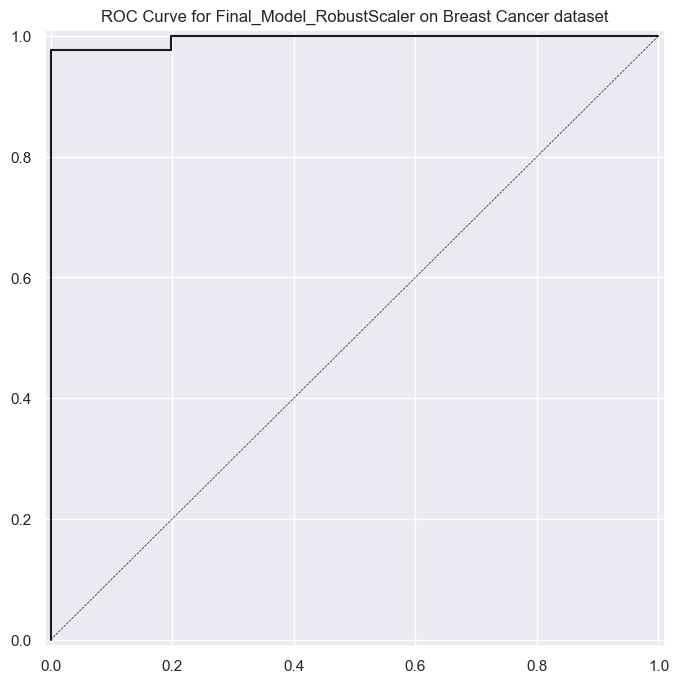

In [41]:
y_pred_prob = final_model.predict(X_test)

# Estrai le probabilità positive
y_pred_prob_positive = y_pred_prob.flatten()

# Chiamare la funzione plot_roc
plot_roc(y_test_robust, y_pred_prob_positive, 'Final_Model_RobustScaler')
plt.show()

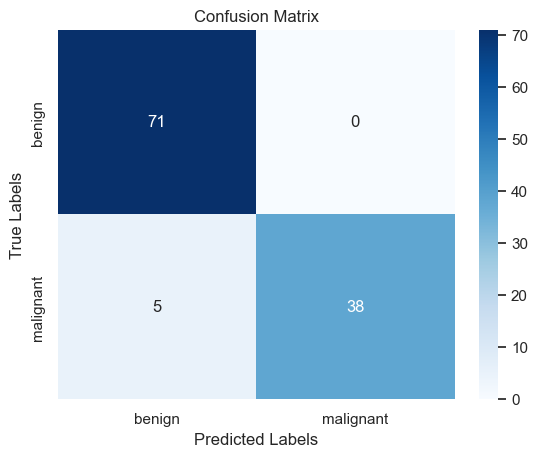

In [42]:
y_pred_labels = (y_pred_prob_positive > 0.5).astype(int)

# Calcola la matrice di confusione
cm = confusion_matrix(y_test_robust, y_pred_labels)
class_labels = ["benign", "malignant"]

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show();

<a id="conclusions"></a>
<h2 style="text-align: center;"><strong>Conclusions</strong></h2>

The model with data normalization using StandardScaler performs slightly better compared to the model developed based on RobustScaler. <br>
Ultimately, the model excels in accurately classifying the difference between benign and malignant tumors using this data. <br>
This is certainly a significant success, and the quest for a better life should never cease. 

Thanks to everyone for the attention.